# Decision tree for regression

In [4]:
import pandas as pd

penguins = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

In [5]:
import numpy as np

# Generate data for the test
# np.arange generates data evenly in the interval indicated np.arange(start, stop)
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

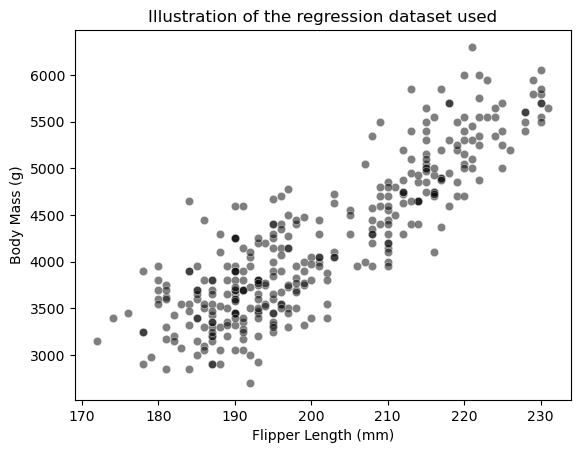

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the original datasets used
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

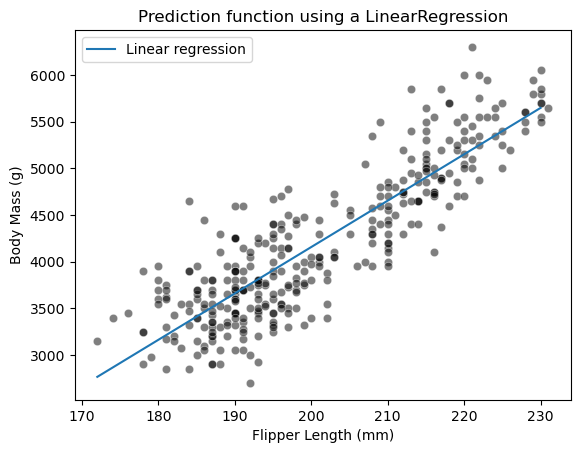

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

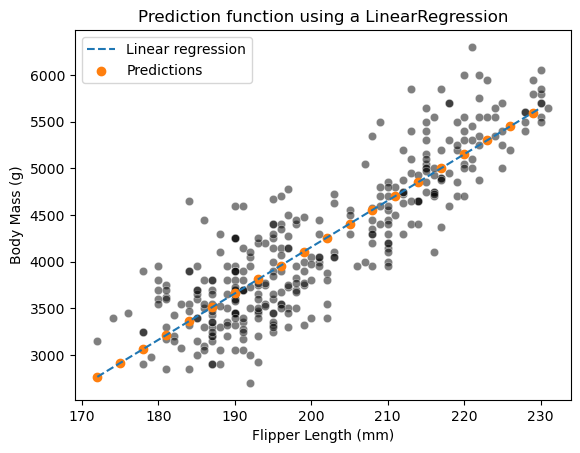

In [11]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

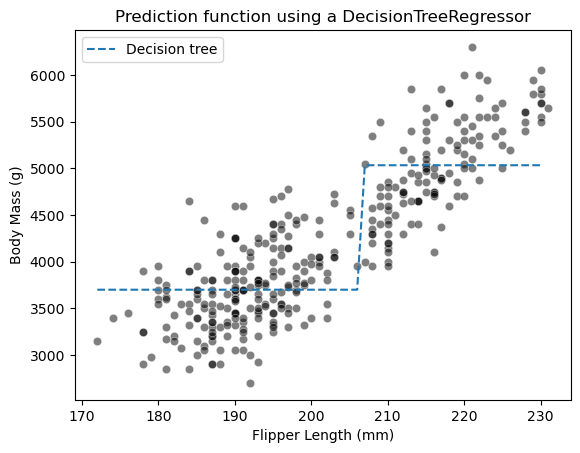

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree", linestyle="--")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

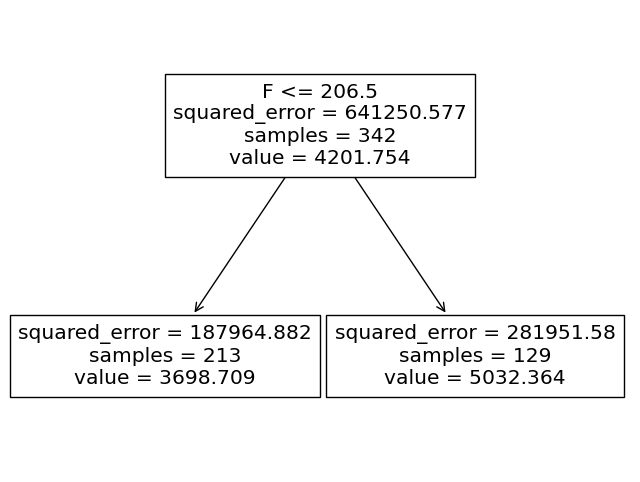

In [17]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=feature_name, ax=ax)

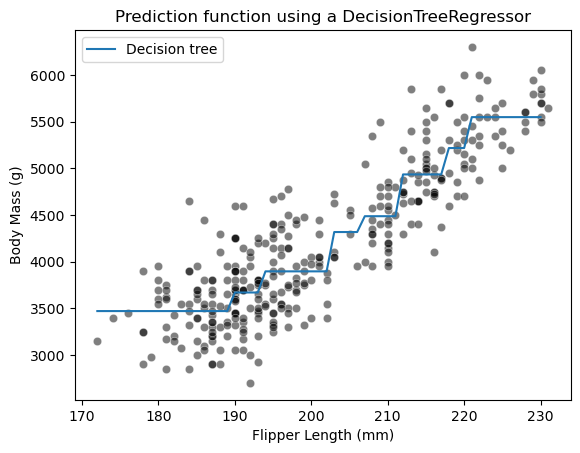

In [18]:
tree3 = DecisionTreeRegressor(max_depth=3)
tree3.fit(data_train, target_train)
target_predicted = tree3.predict(data_test)

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

# Exercise M5.02

In [19]:
import pandas as pd

penguins = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear regression model
lr = LinearRegression()
lr. fit(data_train, target_train);
# Decision Tree Regression Model
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train);

In [23]:
# Create a symthetic dataset
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(), data_train[feature_name].max()), 
                         columns=[feature_name])

lr_predict = lr.predict(data_test)
tree_predict = tree.predict(data_test)   

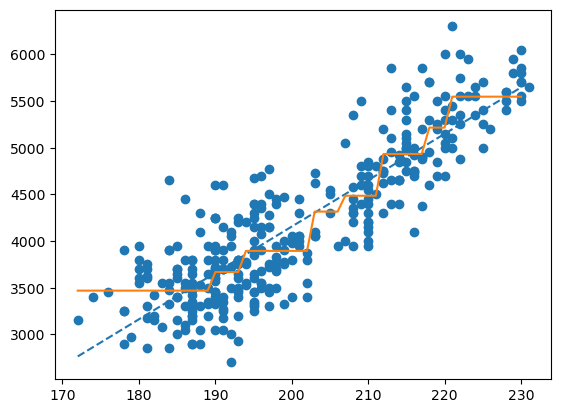

In [25]:
from matplotlib import pyplot as plt

plt.scatter(data_train, target_train, label="train data")
plt.plot(data_test, lr_predict, label="linear regression", linestyle="--")
plt.plot(data_test, tree_predict, label="tree regression")

In [28]:
# Add values outside the boundaries in the test set
offset = 30
data_test2 = pd.DataFrame(np.arange(data_train[feature_name].min() - offset,
                                   data_train[feature_name].max() + offset),
                         columns=[feature_name])

lr_predict2 = lr.predict(data_test2)
tree_predict2 = tree.predict(data_test2)

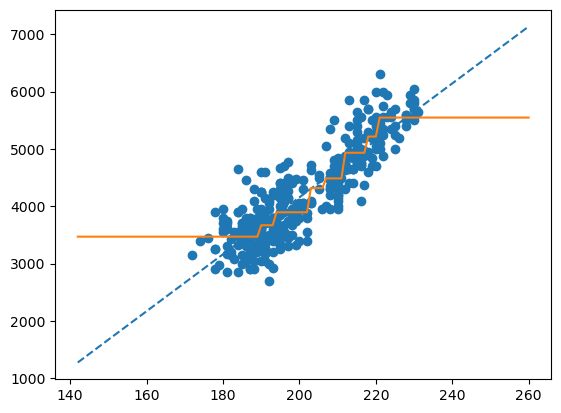

In [29]:
# Make predictions with both models on this new interval of data and repeat the plot

plt.scatter(data_train, target_train, label="train data")
plt.plot(data_test2, lr_predict2, label="linear regression", linestyle="--")
plt.plot(data_test2, tree_predict2, label="tree regression")

# Importance of decision tree hyperparameters on generalization

In [30]:
import pandas as pd

data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/penguins_classification.csv")

In [32]:
data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("/Users/ggomezji/Documents/Scikit-Learn_MOOC/git_clone/datasets/penguins_regression.csv")

In [34]:
# Helper functions

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model, data[feature_names], response_method="predict",
        cmap="RdBu", alpha=0.5
    )
    sns.scatterplot(data=data, x=feature_names[0], y=feature_names[1],
                    hue=target_names, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5)
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

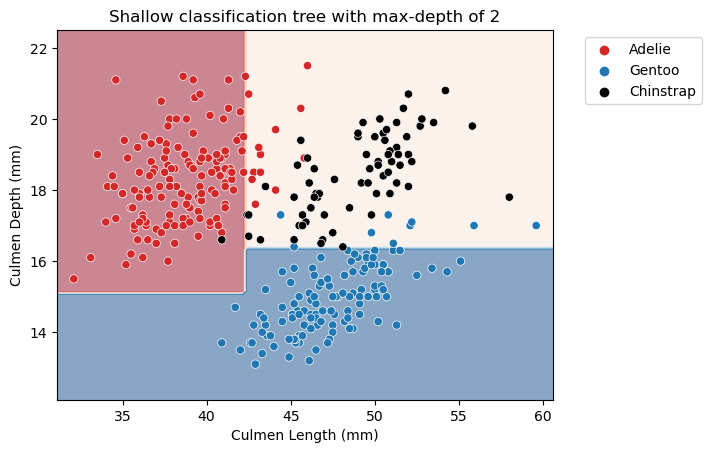

In [37]:
# Effect of the max_depth parameter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column)
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

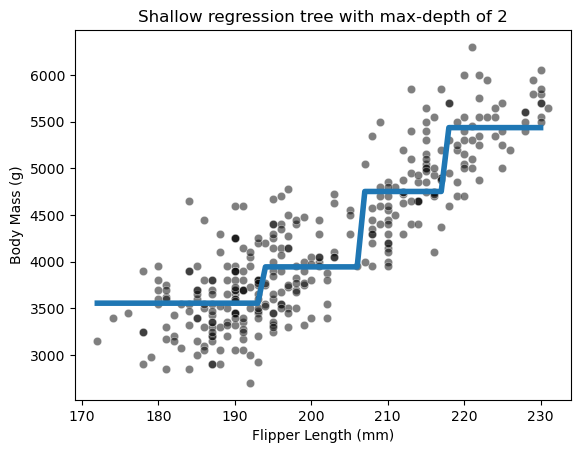

In [38]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column)
_ = plt.title(f"Shallow regression tree with max-depth of {max_depth}")

In [39]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

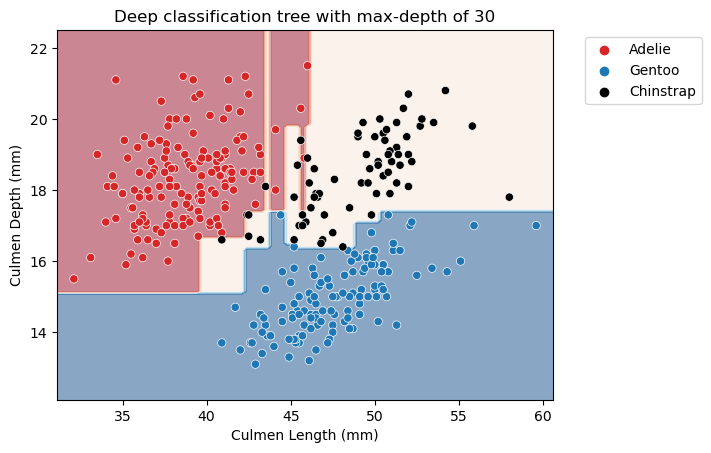

In [40]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column)
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

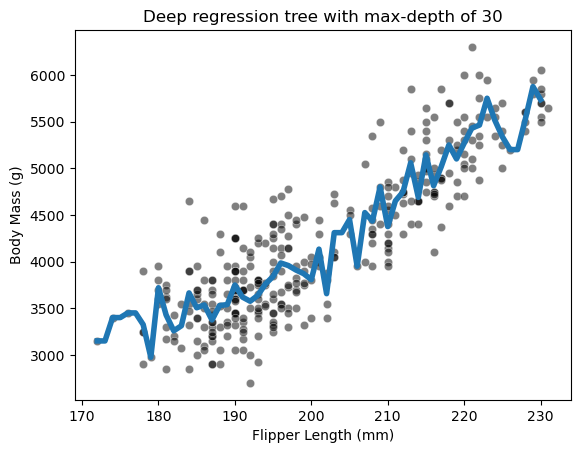

In [41]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column)
_ = plt.title(f"Deep regression tree with max-depth of {max_depth}")

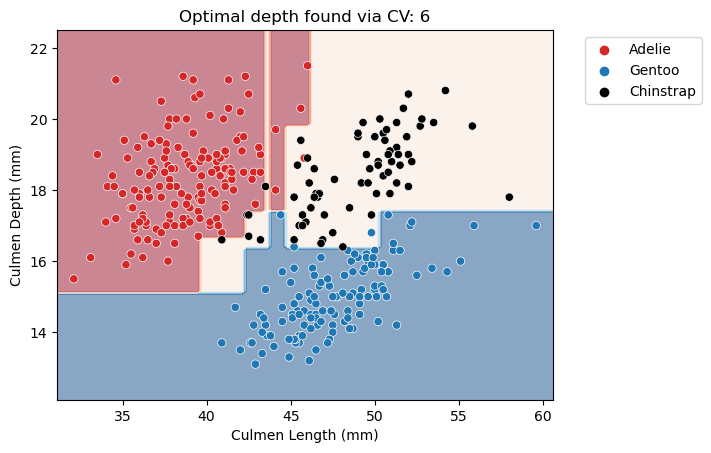

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column)
_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_clf.best_params_['max_depth']}")

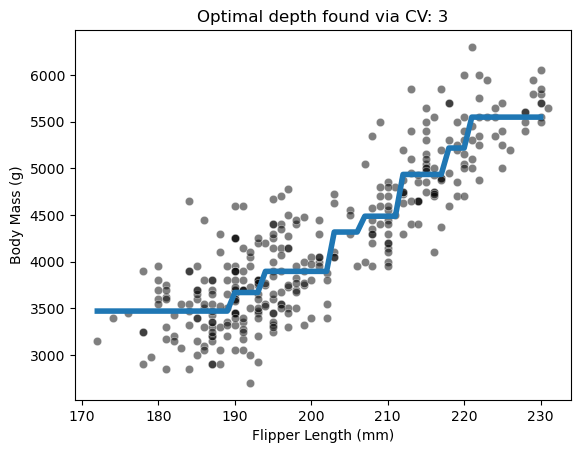

In [43]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column)
_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_reg.best_params_['max_depth']}")

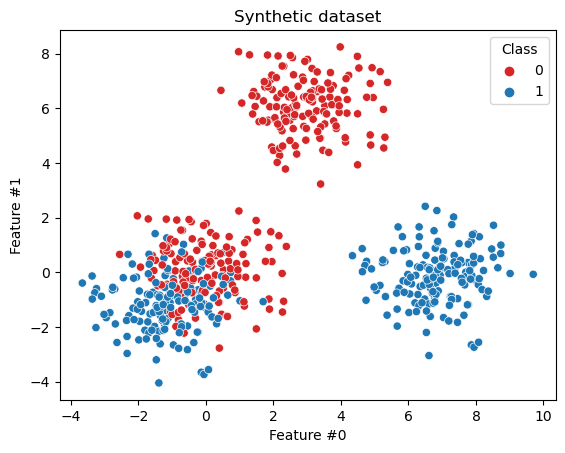

In [44]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that will be interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0)
# Blobs that will be easily separated
X_2, y_2 = make_blobs(
    n_samples=300, centers=[[3, 6], [7, 0]], random_state=0)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column])
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

sns.scatterplot(data=data_clf, x=data_clf_columns[0], y=data_clf_columns[1],
                hue=target_clf_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Synthetic dataset")

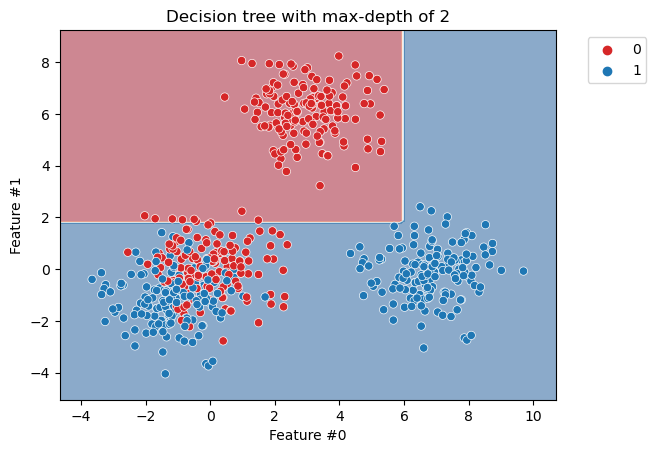

In [45]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

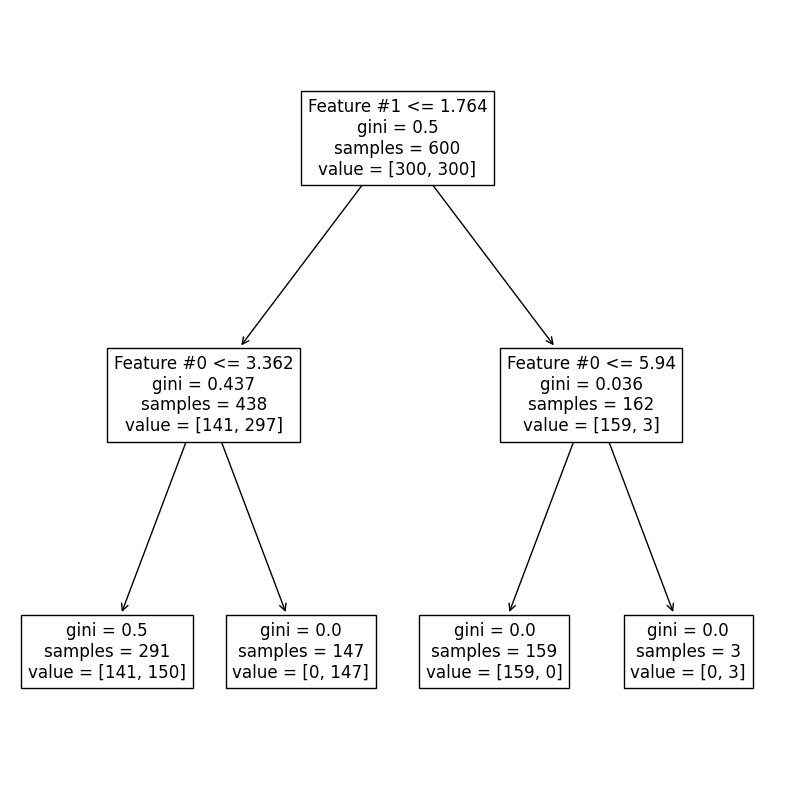

In [46]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

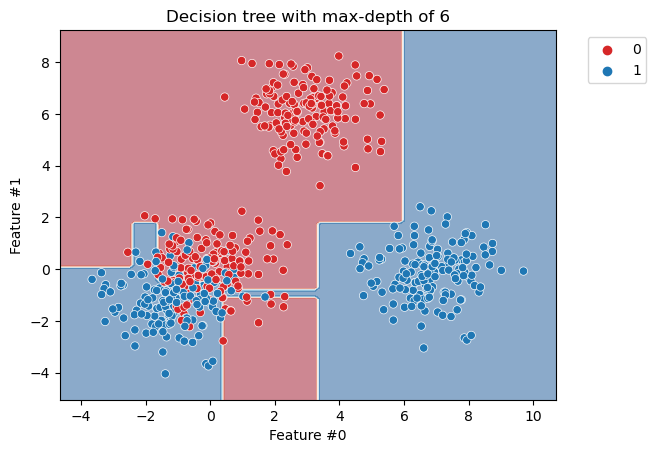

In [47]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

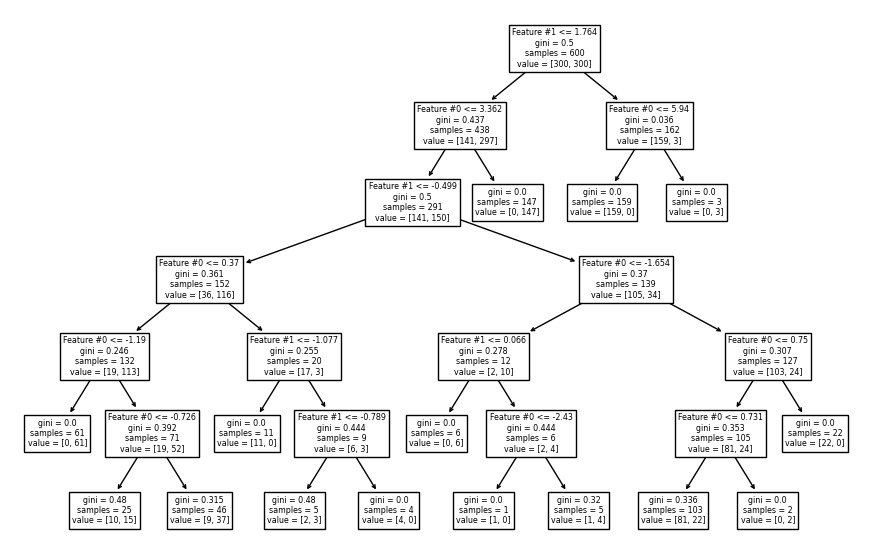

In [48]:
_, ax = plt.subplots(figsize=(11, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

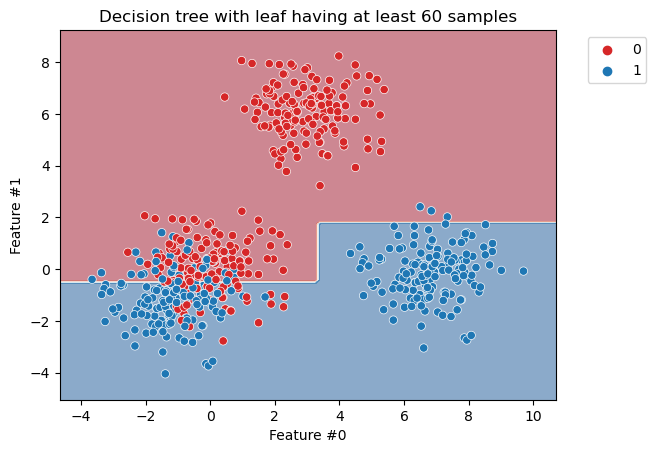

In [49]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column)
_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples")

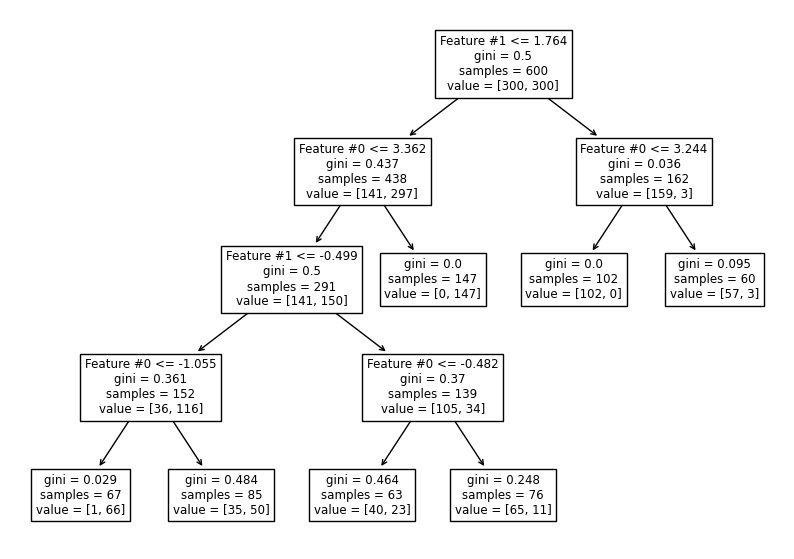

In [50]:
_, ax = plt.subplots(figsize=(10, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)